In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px

In [4]:
diamonds = pd.read_csv('../data/diamonds_clean.csv')
diamonds.drop('Unnamed: 0', axis=1,inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale,cut_scale
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,3,0,5
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,3,2,4
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,4,3,2
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,2,6,1
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,2,3,0


**1. Color** 

In [5]:
diamonds['color_scale'].describe()

count    40439.000000
mean         3.400999
std          1.701466
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: color_scale, dtype: float64

In [6]:
diamonds.groupby('color_scale').mean()

,carat,depth,table,price,x,y,z,clarity_scale,cut_scale
color_scale,,,,,,,,,
0,1.166500,61.909626,57.790701,5346.234112,6.527285,6.520822,4.039879,2.753271,2.580841
1,1.026487,61.873356,57.562466,5088.312081,6.215527,6.212622,3.843032,2.943190,2.374845
2,0.909541,61.828268,57.532972,4468.987883,5.981162,5.974460,3.698434,2.943240,2.444834
3,0.773903,61.753249,57.285963,4021.065215,5.683880,5.693846,3.511348,3.459581,2.252219
4,0.731423,61.689642,57.409118,3677.586923,5.603611,5.608556,3.457857,3.135229,2.273665
5,0.658835,61.659836,57.494567,3088.342526,5.413894,5.419155,3.338709,2.968874,2.315495
6,0.653036,61.721886,57.344959,3134.943157,5.404704,5.409541,3.336782,2.705090,2.178055


As the color level increases (worse-better) the price decreases, however for the best color there is a slight increase in value compared to the previous color.

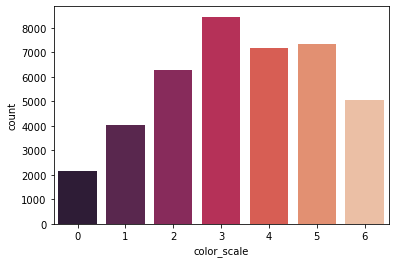

In [7]:
sns.countplot(data = diamonds, x = diamonds['color_scale'], palette='rocket')
plt.show();

**most common color is 3**

**2. Carat**

In [8]:
diamonds.groupby('carat').mean()

,depth,table,price,x,y,z,clarity_scale,color_scale,cut_scale
carat,,,,,,,,,
0.20,60.433333,59.666667,363.333333,3.810000,3.775000,2.291667,2.666667,5.333333,3.333333
0.21,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222,2.666667,5.444444,4.888889
0.22,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000,2.600000,4.800000,4.400000
0.23,61.362150,58.219626,487.261682,3.948551,3.973598,2.429720,4.915888,4.504673,3.107477
0.24,61.541622,57.605405,506.778378,3.991784,4.021081,2.464162,4.962162,4.237838,2.794595
...,...,...,...,...,...,...,...,...,...
3.51,62.500000,59.000000,18701.000000,9.660000,9.630000,6.030000,3.000000,0.000000,5.000000
4.00,63.300000,58.000000,15984.000000,10.010000,9.940000,6.310000,0.000000,1.000000,4.000000
4.01,61.750000,61.500000,15223.000000,10.080000,4.970000,6.205000,0.000000,0.500000,5.000000


**The price increases when carat increases**

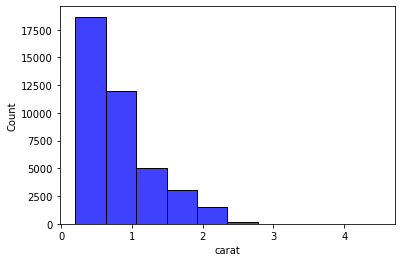

In [9]:
sns.histplot(diamonds['carat'],bins=10,kde=False,color='blue')
plt.show();

**3.Clarity**

In [10]:
diamonds.groupby('clarity_scale').mean()

,carat,depth,table,price,x,y,z,color_scale,cut_scale
clarity_scale,,,,,,,,,
0,1.299750,62.811052,58.231194,3971.285205,6.782335,6.693048,4.242389,2.909091,2.511586
1,1.081025,61.779798,57.907876,5097.658092,6.411251,6.400991,3.959506,3.464306,2.734249
2,0.850893,61.859793,57.648374,3997.326665,5.888074,5.887755,3.640737,3.431210,2.542321
3,0.762483,61.721512,57.405148,3911.865780,5.655169,5.656321,3.490413,3.487238,2.333117
4,0.721484,61.679637,57.283809,3796.387469,5.556353,5.564323,3.428770,3.172300,2.174773
5,0.591777,61.658884,57.031561,3240.978942,5.206976,5.235979,3.213917,3.570150,1.911556
6,0.506994,61.606921,56.929740,2559.498558,4.973554,4.988504,3.068893,3.359048,1.775775
7,0.499849,61.511454,56.496684,2797.897513,4.953451,4.975011,3.052427,3.104748,1.255463


**no relationship between price and clarity**

The price is directly related to the carat inversely related to the color. The other parameters do not appear to have a relationship with the price.

**4. Cut**

In [11]:
diamonds.groupby('cut_scale').mean()

,carat,depth,table,price,x,y,z,clarity_scale,color_scale
cut_scale,,,,,,,,,
0,0.700286,61.703367,55.952984,3435.887779,5.501188,5.512915,3.397400,3.460969,3.475521
1,0.843925,62.405958,58.651107,3877.262093,5.826778,5.838177,3.636332,2.598524,3.405575
2,1.047229,64.056826,59.015543,4331.587993,6.253964,6.181020,3.988470,2.005757,3.129934
4,0.808056,61.824794,57.956031,3994.444420,5.743912,5.779277,3.559988,2.992413,3.432875
5,0.895446,61.261526,58.737430,4612.072383,5.981447,5.947324,3.655718,2.736026,3.285338


**no relationship between price and cut**

**5. Going deeper**

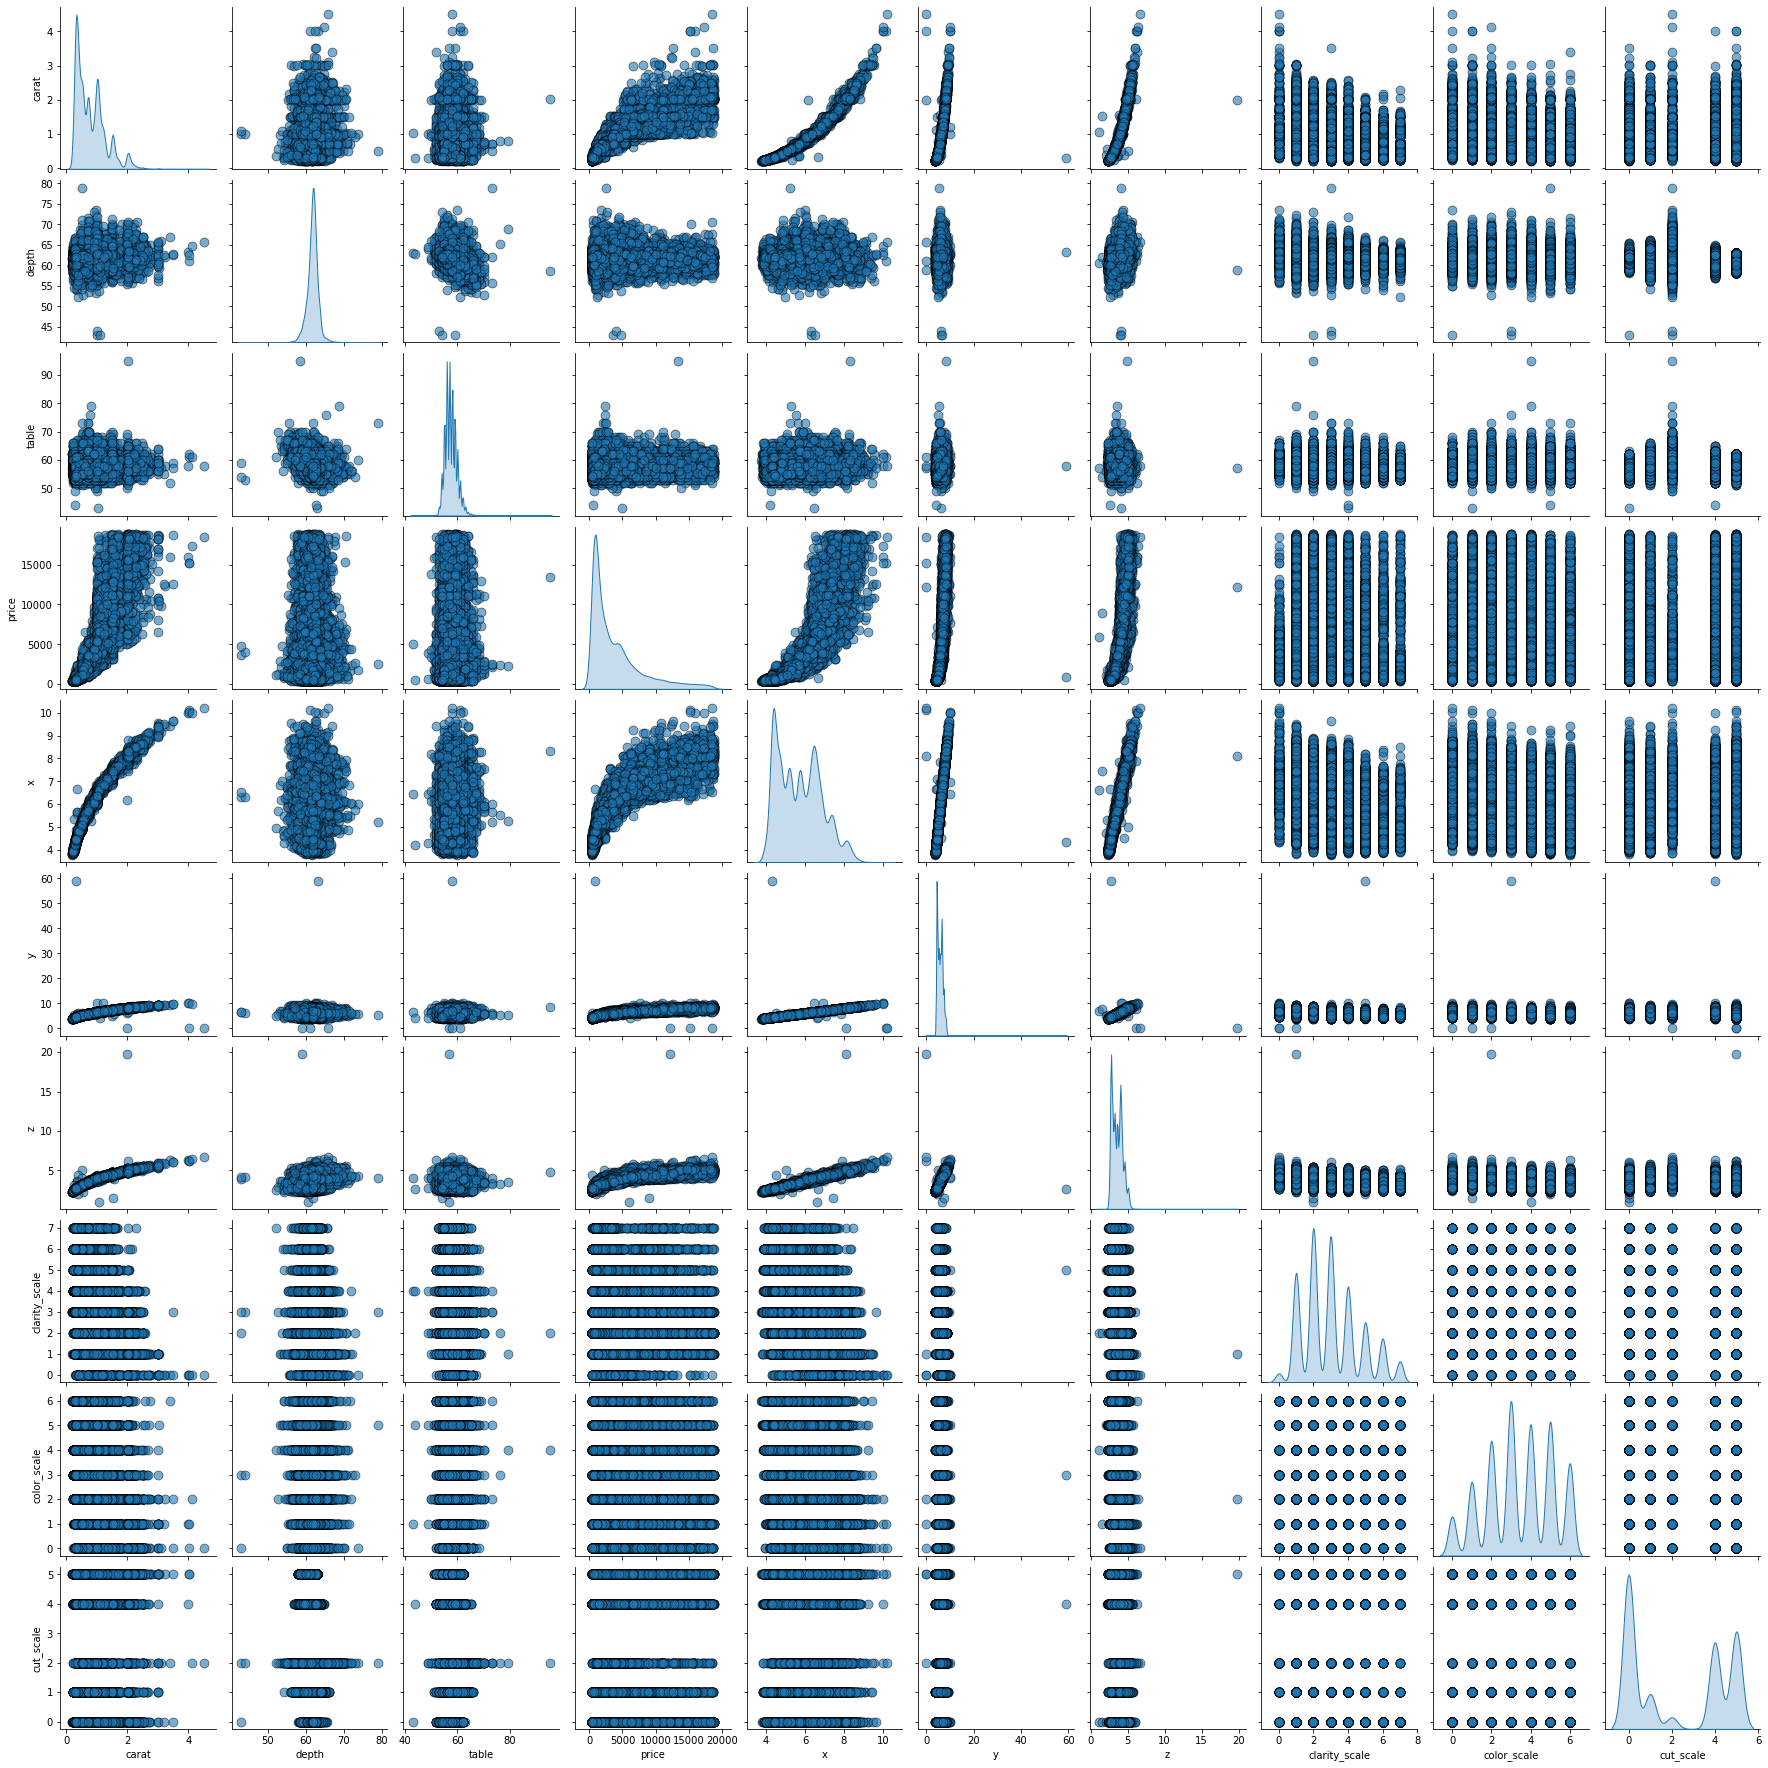

In [12]:
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.show();

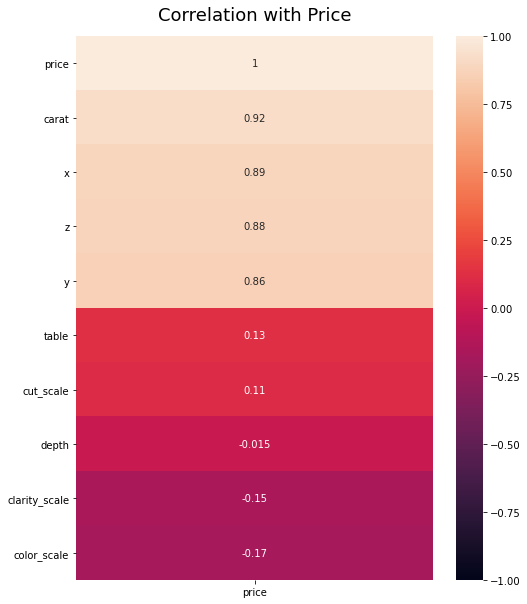

In [13]:
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(diamonds.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation with Price', fontdict={'fontsize':18}, pad=16)
plt.show();

**Price has a strong correlation with carat, x, y and z**

**Carat must be related to the dimensions** 

Although color and clarity have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. Different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to carat (weight) and its dimensions.

**Bonus Challenge: Hypothesis Testing**

In [14]:
from scipy.stats import ttest_1samp
from scipy import stats

**Test 1** 

In [15]:
prices = diamonds['price'].tolist()
h0 = 'average price is not 4000 USD'
h1 = 'average price is 4000 USD'

testing_result = ttest_1samp(prices, 4000)
if testing_result.pvalue <= 0.05:
    print(f'{h1}')
else:
    print(f'{h0}')

average price is 4000 USD


**Test 2**

Sub-Test 1: Fair cut + color G vs. Fair cut + color I

In [16]:
group_1 = diamonds['price'][(diamonds['cut_scale'] == 2) & (diamonds['color_scale'] == 3)].tolist()
group_2 = diamonds['price'][(diamonds['cut_scale'] == 2) & (diamonds['color_scale'] == 1)].tolist()

h0 = 'color G (3) and color I (1) have similar prices'
h1 = 'color G (3) and color I (1) do not have similar prices'

testing_result = stats.ttest_ind(group_1, group_2, equal_var = False)
if testing_result.pvalue <= 0.05:
    print(f'{h1}')
else:
    print(f'{h0}')

color G (3) and color I (1) have similar prices


Sub-Test 2: Good cut + color E vs. Good cut + color F

In [17]:
group_1 = diamonds['price'][(diamonds['cut_scale'] == 1) & (diamonds['color_scale'] == 5)].tolist()
group_2 = diamonds['price'][(diamonds['cut_scale'] == 1) & (diamonds['color_scale'] == 4)].tolist()

h0 = 'color E (5) and color F (4) have similar prices'
h1 = 'color E (5) and color F (4) do not have similar prices'

testing_result = stats.ttest_ind(group_1, group_2, equal_var = False)
if testing_result.pvalue <= 0.05:
    print(f'{h1}')
else:
    print(f'{h0}')

color E (5) and color F (4) have similar prices


Sub-Test 3: Ideal cut + color D vs. Ideal cut + color E

In [18]:
group_1 = diamonds['price'][(diamonds['cut_scale'] == 0) & (diamonds['color_scale'] == 6)].tolist()
group_2 = diamonds['price'][(diamonds['cut_scale'] == 0) & (diamonds['color_scale'] == 5)].tolist()

h0 = 'color D (6) and color E (5) have similar prices'
h1 = 'color D (6) and color E (5) do not have similar prices'

testing_result = stats.ttest_ind(group_1, group_2, equal_var = False)
if testing_result.pvalue <= 0.05:
    print(f'{h1}')
else:
    print(f'{h0}')

color D (6) and color E (5) have similar prices



Sub-Test 4: Premium cut + color D vs. Premium cut + color E

In [19]:
group_1 = diamonds['price'][(diamonds['cut_scale'] == 5) & (diamonds['color_scale'] == 6)].tolist()
group_2 = diamonds['price'][(diamonds['cut_scale'] == 5) & (diamonds['color_scale'] == 5)].tolist()

h0 = 'color D (6) and color E (5) have similar prices'
h1 = 'color D (6) and color E (5) do not have similar prices'

testing_result = stats.ttest_ind(group_1, group_2, equal_var = False)
if testing_result.pvalue <= 0.05:
    print(f'{h1}')
else:
    print(f'{h0}')

color D (6) and color E (5) have similar prices


Sub-Test 5: Very Good cut + color I vs. Very Good cut + color J

In [20]:
group_1 = diamonds['price'][(diamonds['cut_scale'] == 4) & (diamonds['color_scale'] == 1)].tolist()
group_2 = diamonds['price'][(diamonds['cut_scale'] == 4) & (diamonds['color_scale'] == 0)].tolist()

h0 = 'color I (1) and color J (0) have similar prices'
h1 = 'color I (4) and color J (0) do not have similar prices'

testing_result = stats.ttest_ind(group_1, group_2, equal_var = False)
if testing_result.pvalue <= 0.05:
    print(f'{h1}')
else:
    print(f'{h0}')

color I (1) and color J (0) have similar prices


Sub-Test 6: All cuts + color D vs. All cuts + color E

In [21]:
group_1 = diamonds['price'][(diamonds['color_scale'] == 6)].tolist()
group_2 = diamonds['price'][(diamonds['color_scale'] == 5)].tolist()

h0 = 'color D (6) and color E (5) have similar prices'
h1 = 'color D (6) and color E (5) do not have similar prices'

testing_result = stats.ttest_ind(group_1, group_2, equal_var = False)
if testing_result.pvalue <= 0.05:
    print(f'{h1}')
else:
    print(f'{h0}')

color D (6) and color E (5) have similar prices


**Color might be not a key factor to determinate the price of diamonds**